- pip install music21

In [89]:
from unroll.KeyStrikes import KeyStrikes
import music21
import numpy as np
import os.path
import math
import matplotlib.pyplot as plt

In [13]:
path_midifile = "./Midi/PUZZLE.mid"

## Midi파일 불러오기
midi -> music32 stream -> midi<br>
mf 파일의 ticksperQuarterNote 를 1024 기준으로 바꿔주기

In [14]:
mf = music21.midi.MidiFile()
# path_midifile = path_data + '/' + filename
mf.open(path_midifile)
mf.read()
mf.close()

In [15]:
s = music21.midi.translate.midiFileToStream(mf)
mf = music21.midi.translate.streamToMidiFile(s)

In [16]:
s

<music21.stream.Score 0x7f95c4839b00>

#### 트랙별 루프를 돌면서 note 정보 읽기

In [17]:
result = []
for i in range(len(mf.tracks)):
    t = 0
    for e in mf.tracks[i].events:
        if e.isDeltaTime() and e.time is not None:
            t += e.time
        elif e.isNoteOn() and e.pitch is not None and e.velocity != 0:
            result.append({'time': t, 'note': e.pitch})

#### duration을 가질수 있도록 list로 변환

In [23]:
ks = KeyStrikes(result)
ks = ks.quantized(mf.ticksPerQuarterNote)
ks

In [64]:
# tick 간격 = 1/8분 음표 단위로
tick_step = mf.ticksPerQuarterNote / 2
# 총 tick 카운트
total_tick = ks.keystrikes[-1]['time'] + ks.keystrikes[-1]['duration'] * mf.ticksPerQuarterNote
# 총 sequence 갯수
total_beat = total_tick / tick_step

In [60]:
# 하나의 midi 파일의 one hot vector 를 저장할 임시 matrix
data_dim = 129
one_X_train = np.zeros((math.ceil(total_beat + 1), data_dim), dtype='int32')

In [86]:
# 1024 기준으로 convert 된 건반 정보를 루프를 돌면서 디코딩
for strike in ks.keystrikes:
    # 1/8 음표 단위의 index
    idx = math.ceil(strike['time'] / tick_step)
    # 1/8 음표 단위 기준 note 의 지속시간 (index 를 몇개 채울거니? 를 계산)
    dur = int(strike['duration'] * 2)
    # note 별로 one-hot vector 채우기
    for note in strike['note']:
        # 지속시간 만큼 making
        for i in range(dur):
            one_X_train[idx + i, note] = 1

In [87]:
note_dim = 128
one_X_train[-1, note_dim] = 1

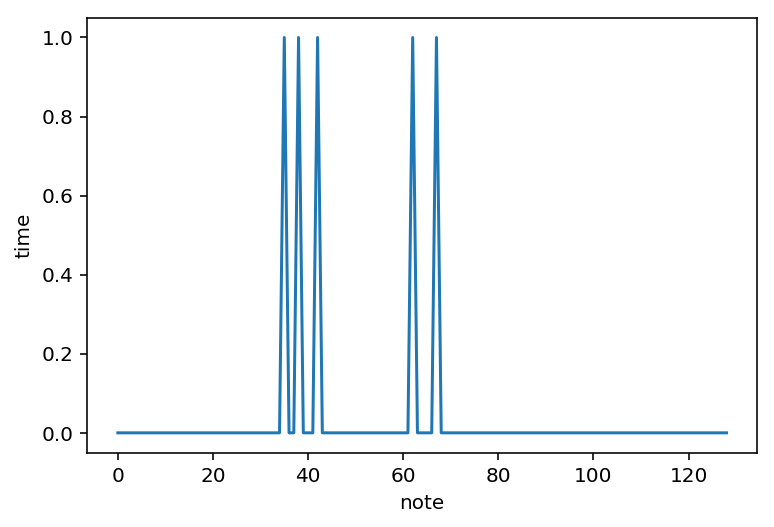

In [95]:
plt.plot(one_X_train[100])
plt.xlabel('note')
plt.ylabel('time')
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)